<a href="https://colab.research.google.com/github/suriarasai/BEAD2025/blob/main/colab/10AgentDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agentic AI Demo using Diabetic Data Set and Gemini. Use the prompt below:

This is data from diabetic prediction. I want to extract key insights from this data. Also, clean up the data, fill null values intelligently, perform feature engineering techniques and run a prediction model on outcome variables. Analyse the predictive model results to derive new insight.

# Task
This is data from diabetic prediction. I want to extract key insights from this data. Also, clean up the data, fill null values intelligently, perform feature engineering techniques and run a prediction model on outcome variables. Analyse the predictive model results to derive new insight.

Here is all the data you need:
"diabetes.csv"

## Data loading

### Subtask:
Load the diabetes dataset.


**Reasoning**:
Load the diabetes dataset and display basic information.



In [ ]:
import pandas as pd

try:
    df_diabetes = pd.read_csv('diabetes.csv')
    display(df_diabetes.head())
    display(df_diabetes.info())
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

## Data exploration

### Subtask:
Explore the diabetes dataset to understand its characteristics.


**Reasoning**:
Explore the diabetes dataset by examining its shape, data types, descriptive statistics, outcome variable distribution, distributions of other numerical features, missing values, and correlations between features.



Shape of the dataset: (768, 9)

Data types of each column:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive statistics for numerical features:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  1

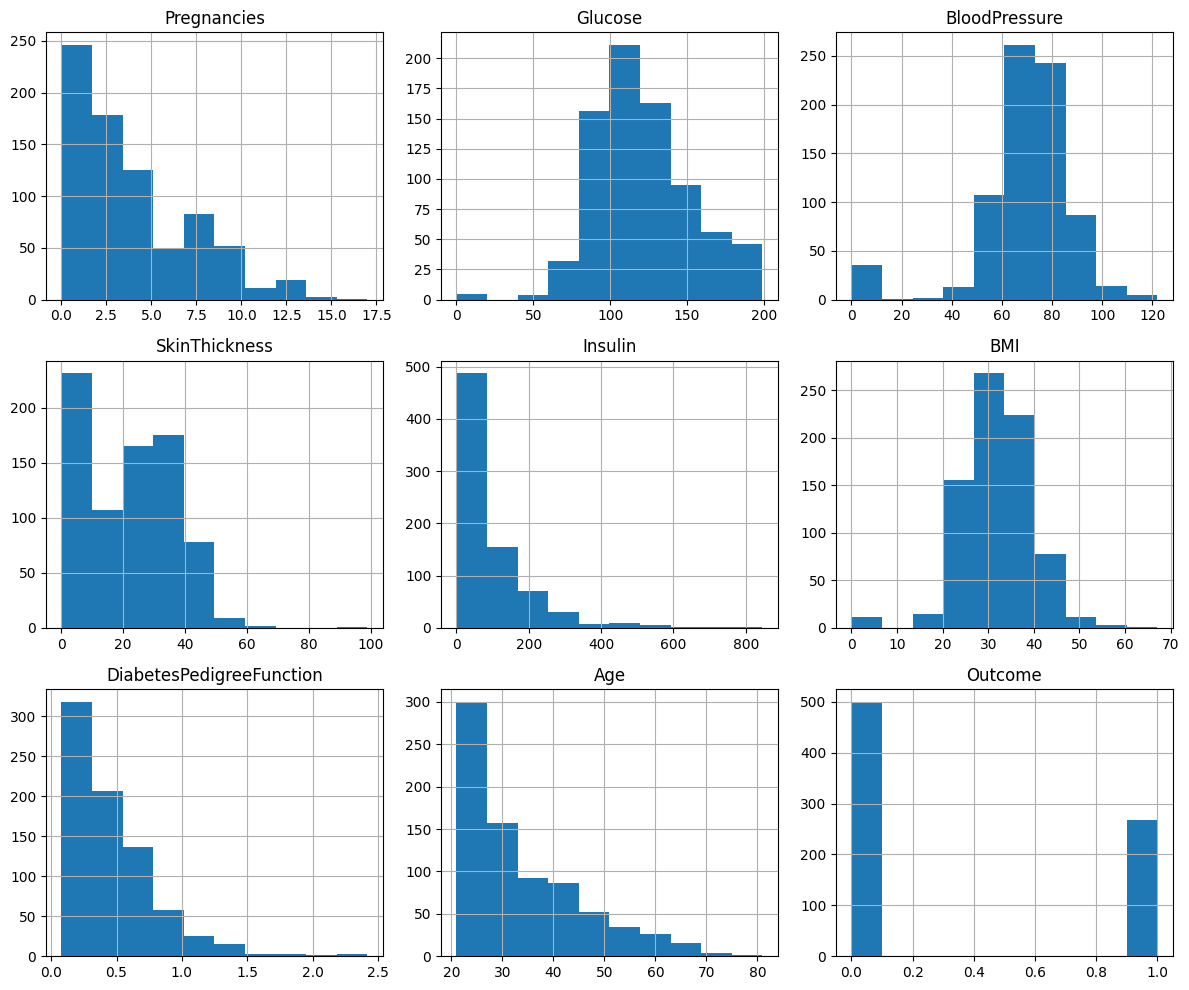


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Correlation matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age               

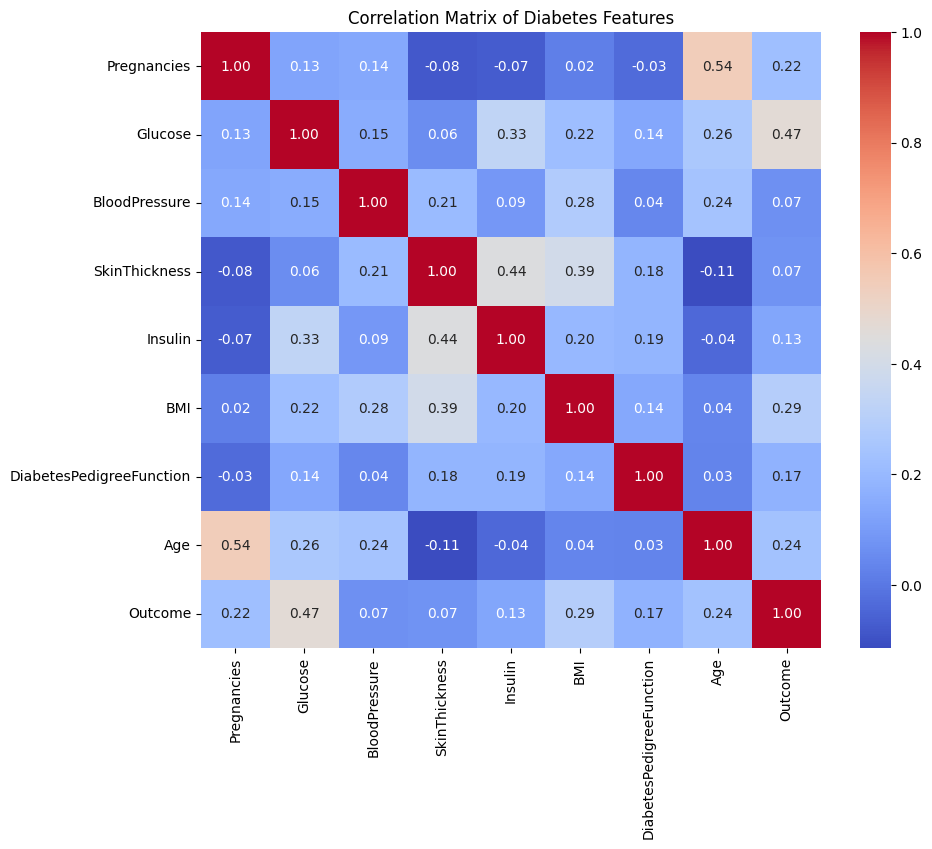

In [ ]:
# Examine the shape of the dataset
print("Shape of the dataset:", df_diabetes.shape)

# Check the data types of each column
print("\nData types of each column:\n", df_diabetes.dtypes)

# Summarize descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features:\n", df_diabetes.describe())

# Analyze the distribution of the outcome variable
print("\nDistribution of the outcome variable:\n", df_diabetes['Outcome'].value_counts())

# Investigate distributions of other numerical features (using histograms)
import matplotlib.pyplot as plt
df_diabetes.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Check for missing values
print("\nMissing values per column:\n", df_diabetes.isnull().sum())

# Examine the correlation between numerical features
correlation_matrix = df_diabetes.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Features')
plt.show()

## Data cleaning

### Subtask:
Clean the diabetes dataset by handling missing values and outliers.


**Reasoning**:
Replace impossible zero values with the median for specified columns, handle outliers using Winsorization, remove duplicate rows, and verify the cleaning.



In [ ]:
import numpy as np

# Replace impossible zero values with the median
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_diabetes[col] = df_diabetes[col].replace(0, np.nan)
    median_value = df_diabetes[col].median()
    df_diabetes[col] = df_diabetes[col].fillna(median_value)


# Winsorize outliers (top and bottom 1%)
from scipy.stats.mstats import winsorize

for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    df_diabetes[col] = winsorize(df_diabetes[col], limits=[0.01, 0.01])

# Remove duplicate rows
df_diabetes.drop_duplicates(inplace=True)

# Verify the cleaning
print("Missing values per column after cleaning:\n", df_diabetes.isnull().sum())
print("\nDescriptive statistics after cleaning:\n", df_diabetes.describe())

#Check for impossible zero values again
print("\nNumber of zeros in specific columns after cleaning:")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{col}: {df_diabetes[df_diabetes[col] == 0][col].count()}")

display(df_diabetes.head())

Missing values per column after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive statistics after cleaning:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.834635  121.731771      72.410156      29.024740  139.731771   
std       3.336808   30.232018      11.702071       8.317253   80.332009   
min       0.000000   67.000000      44.000000      10.000000   23.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.000000  196.0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,44.0,35.0,168.0,43.1,1.699,33,1


## Data analysis

### Subtask:
Analyze the cleaned diabetes dataset to gain insights into the relationships between variables.


**Reasoning**:
Analyze the cleaned dataset by calculating descriptive statistics, analyzing the outcome variable distribution, exploring feature relationships using correlation analysis and visualizing them with a heatmap, and investigating potential interactions between features.



/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

Descriptive statistics for numerical features:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.834635  121.731771      72.410156      29.024740  139.731771   
std       3.336808   30.232018      11.702071       8.317253   80.332009   
min       0.000000   67.000000      44.000000      10.000000   23.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.000000  196.000000     106.000000      52.000000  540.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                 768.00000  768.000000  768.000000  
mean    32.422135                   0.46844   33.205729    0.348958  
std      6.712801                   0.31491   11.645318  

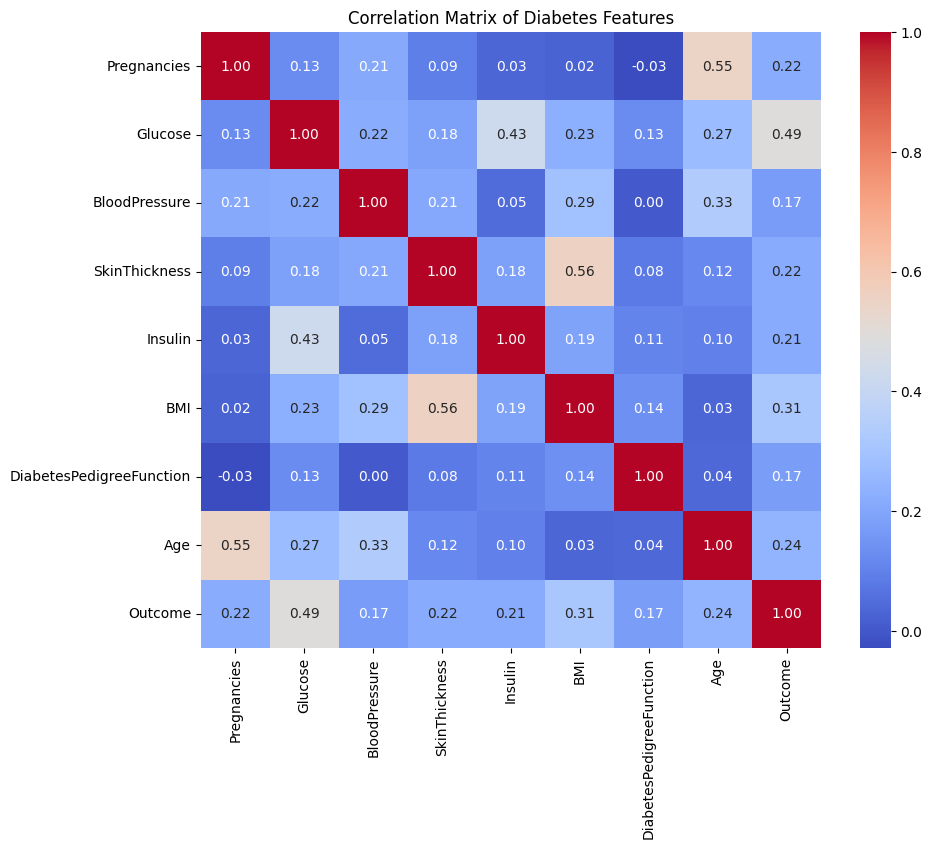

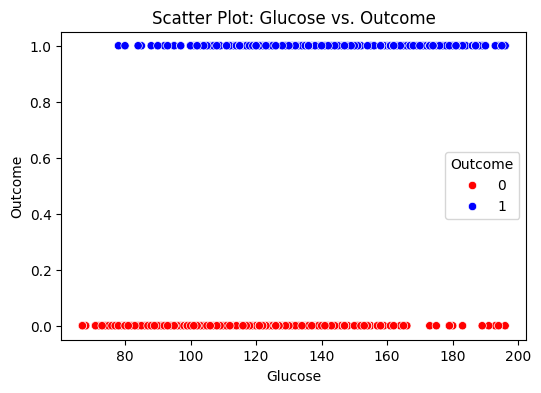

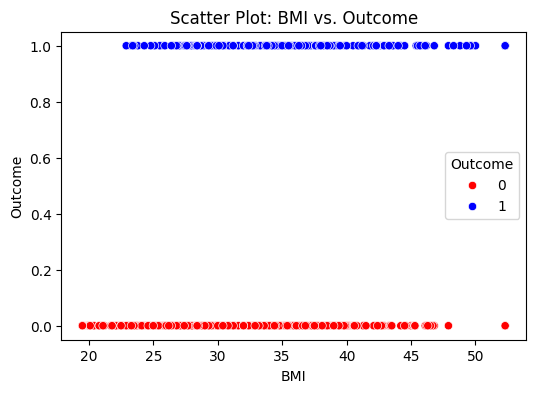

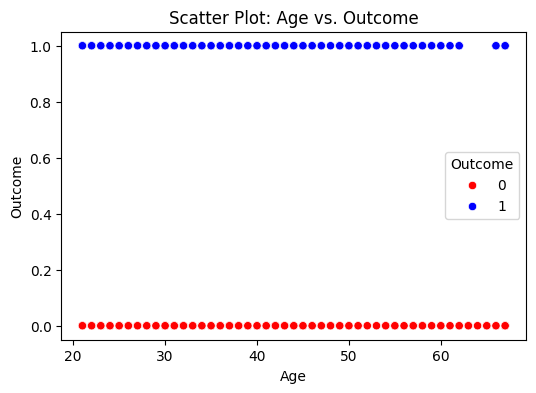

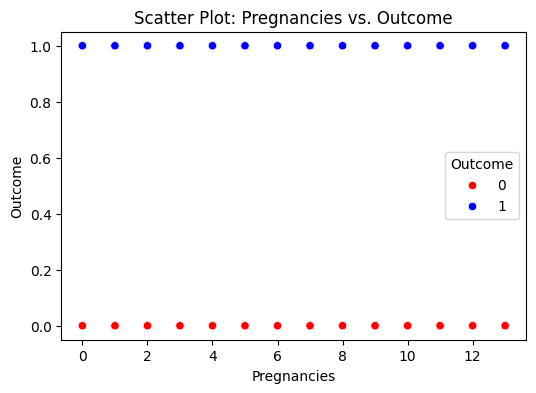

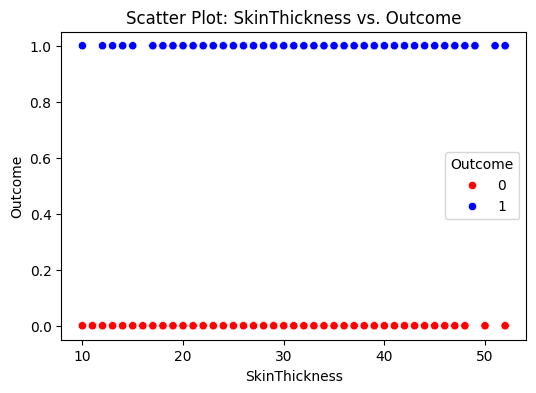

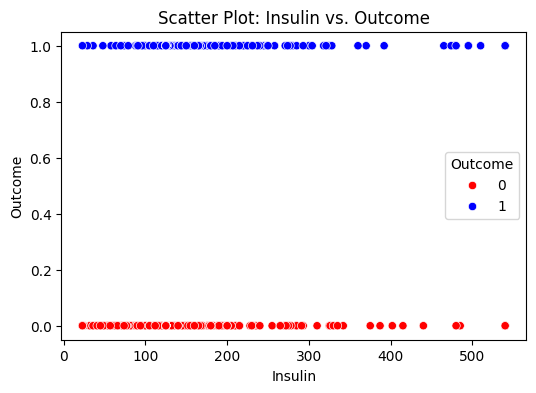

In [ ]:
# Calculate and display descriptive statistics
print("Descriptive statistics for numerical features:\n", df_diabetes.describe())

# Analyze the distribution of the outcome variable
print("\nDistribution of the outcome variable:\n", df_diabetes['Outcome'].value_counts())

# Explore relationships between features and the outcome using correlation analysis
correlation_matrix = df_diabetes.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# Visualize correlations with a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Features')
plt.show()

# Investigate potential interactions between features (e.g., using scatter plots)
# Focus on features with strong correlations to 'Outcome'
strong_correlations = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
strong_features = strong_correlations[strong_correlations > 0.2].index.tolist() # Consider features with correlation above 0.2
strong_features.remove('Outcome')  # Remove 'Outcome' itself

for feature in strong_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='Outcome', data=df_diabetes, hue='Outcome', palette=['red', 'blue'])
    plt.title(f'Scatter Plot: {feature} vs. Outcome')
    plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing ones in the cleaned diabetes dataset.


**Reasoning**:
Engineer new features based on interaction terms, polynomial features, and scaling. Then, perform feature selection.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Interaction features
df_diabetes['Glucose_BMI'] = df_diabetes['Glucose'] * df_diabetes['BMI']
df_diabetes['Age_DiabetesPedigree'] = df_diabetes['Age'] * df_diabetes['DiabetesPedigreeFunction']

# Polynomial features
df_diabetes['Glucose_squared'] = df_diabetes['Glucose']**2
df_diabetes['BMI_squared'] = df_diabetes['BMI']**2

# Scaling/Normalization
scaler = MinMaxScaler()
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_BMI', 'Age_DiabetesPedigree', 'Glucose_squared', 'BMI_squared']
df_diabetes[numerical_features] = scaler.fit_transform(df_diabetes[numerical_features])

# Feature selection
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
selector = SelectKBest(score_func=f_classif, k=10) # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_feature_indices])

# Create a new dataframe with selected features and outcome
df_selected = pd.DataFrame(X_new, columns=selected_features)
df_selected['Outcome'] = y

display(df_selected.head())

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Glucose_BMI,Age_DiabetesPedigree,Glucose_squared,BMI_squared,Outcome
0,0.461538,0.627907,0.595238,0.197292,0.429878,0.630435,0.448106,0.366785,0.513308,0.317918,1
1,0.076923,0.139535,0.452381,0.197292,0.216463,0.217391,0.111119,0.111577,0.080644,0.138983,0
2,0.615385,0.899225,0.452381,0.197292,0.115854,0.239130,0.360013,0.244025,0.854776,0.069060,1
3,0.076923,0.170543,0.309524,0.137331,0.262195,0.000000,0.140931,0.019637,0.101158,0.173823,0
4,0.000000,0.542636,0.595238,0.280464,0.719512,0.260870,0.563910,0.674958,0.420904,0.627318,1


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets as instructed, using `train_test_split` twice with stratification.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df_selected.drop('Outcome', axis=1)
y = df_selected['Outcome']

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 50% validation, 50% test from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## Model training

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
Train a Logistic Regression model on the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained Logistic Regression model.


**Reasoning**:
Optimize the hyperparameters of the Logistic Regression model using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'saga' supports both l1 and l2
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the grid search to the validation data
grid_search.fit(X_val, y_val)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8283333333333334


## Model evaluation

### Subtask:
Evaluate the performance of the optimized Logistic Regression model on the test set.


**Reasoning**:
Evaluate the performance of the optimized Logistic Regression model on the test set using the provided metrics and discuss the results.



Accuracy: 0.7327586206896551
Precision: 0.7083333333333334
Recall: 0.4146341463414634
F1-score: 0.5230769230769231
AUC-ROC: 0.8026016260162601
Confusion Matrix:
[[68  7]
 [24 17]]


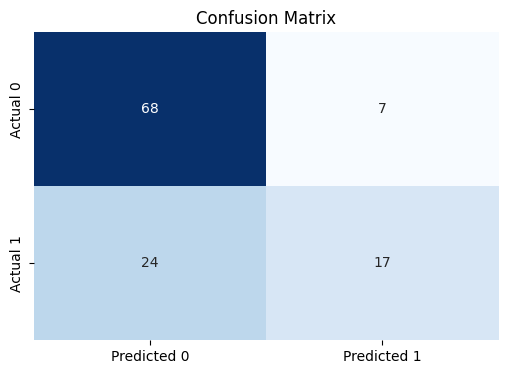


Model Performance Discussion:
Based on the evaluation metrics, the model's performance can be assessed.
The accuracy is 0.7327586206896551, indicating the overall correctness of the predictions.  
The precision is 0.7083333333333334, representing the proportion of correctly predicted positive cases among all predicted positive cases.
The recall is 0.4146341463414634, showing the proportion of correctly predicted positive cases among all actual positive cases.
The F1-score, which is the harmonic mean of precision and recall, is 0.5230769230769231.
The AUC-ROC score is 0.8026016260162601, which represents the area under the receiver operating characteristic curve.
The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class.
Further analysis is needed to understand the trade-offs between precision and recall, and overall model effectiveness in the context of the specific application.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_estimator.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Confusion Matrix:\n{cm}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Discuss the performance
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics, the model's performance can be assessed.")
print(f"The accuracy is {accuracy}, indicating the overall correctness of the predictions.  ")
print(f"The precision is {precision}, representing the proportion of correctly predicted positive cases among all predicted positive cases.")
print(f"The recall is {recall}, showing the proportion of correctly predicted positive cases among all actual positive cases.")
print(f"The F1-score, which is the harmonic mean of precision and recall, is {f1}.")
print(f"The AUC-ROC score is {auc_roc}, which represents the area under the receiver operating characteristic curve.")
print("The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class.")
print("Further analysis is needed to understand the trade-offs between precision and recall, and overall model effectiveness in the context of the specific application.")

## Data visualization

### Subtask:
Visualize the model's performance and important features.


**Reasoning**:
Visualize the model's performance using ROC curve and confusion matrix, and feature importance using a bar plot.



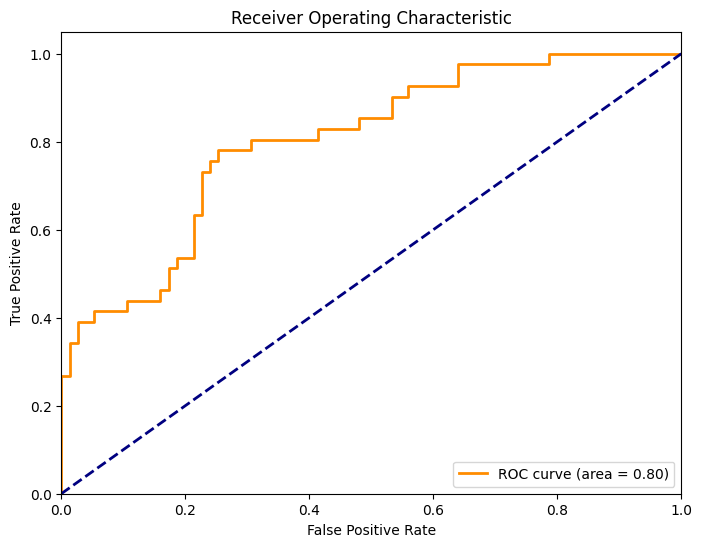

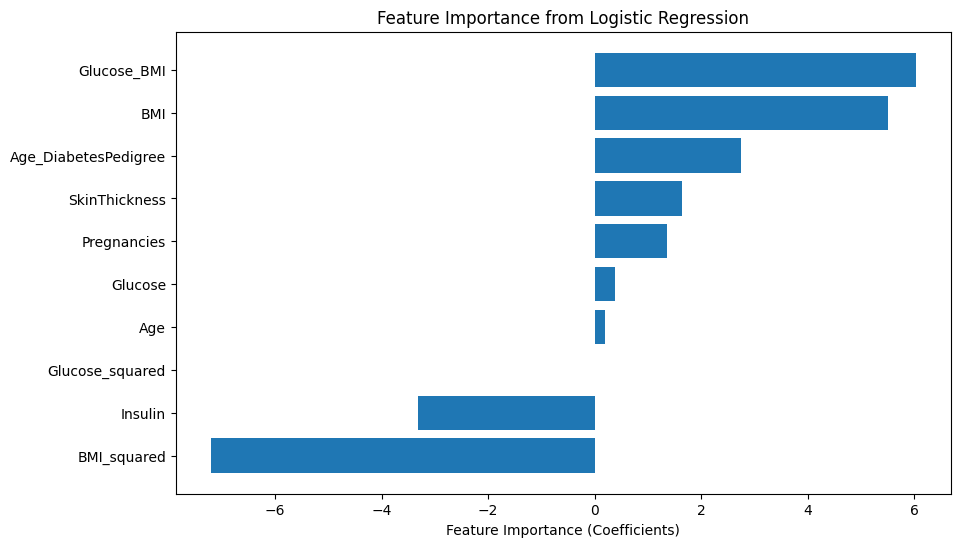

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix Heatmap (already generated in previous step)

# Feature Importance (Coefficients from Logistic Regression)
feature_importance = best_estimator.coef_[0]
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance (Coefficients)")
plt.title("Feature Importance from Logistic Regression")
plt.show()

## Data analysis

### Subtask:
Analyze model predictions and identify patterns or insights.


**Reasoning**:
Analyze model predictions, feature importance, and subgroups, documenting observations and considering class imbalance.



Analysis of Model Predictions:
Number of correct predictions: 85
Number of incorrect predictions: 31


,Feature,Importance
6,Glucose_BMI,6.025432
4,BMI,5.502786
7,Age_DiabetesPedigree,2.753211
2,SkinThickness,1.634067
0,Pregnancies,1.359506
1,Glucose,0.389369
5,Age,0.196042
8,Glucose_squared,0.000000
3,Insulin,-3.315944
9,BMI_squared,-7.199887


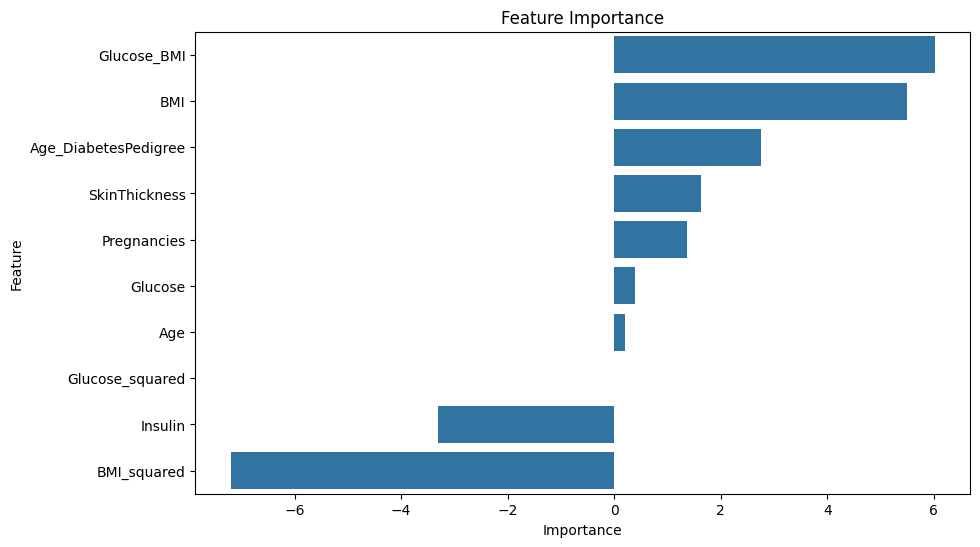

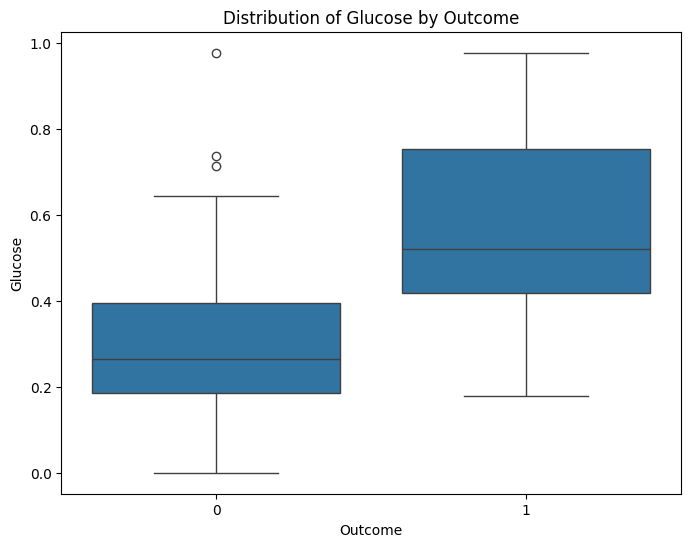

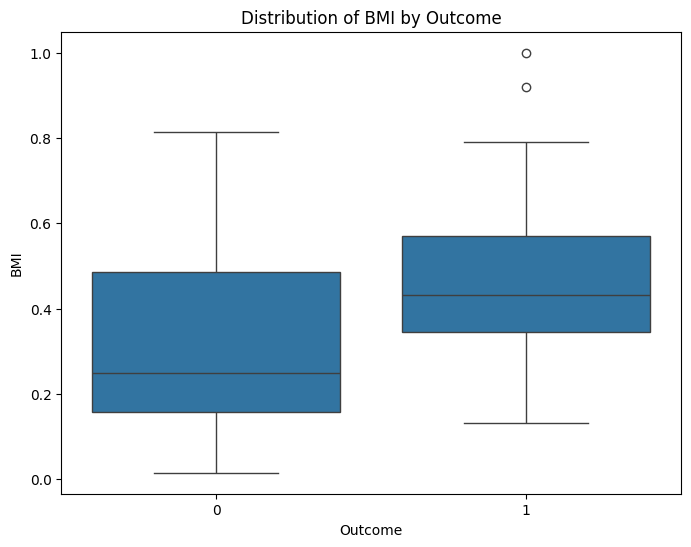


Class Imbalance Analysis:
Number of 0s in y_test: 75
Number of 1s in y_test: 41


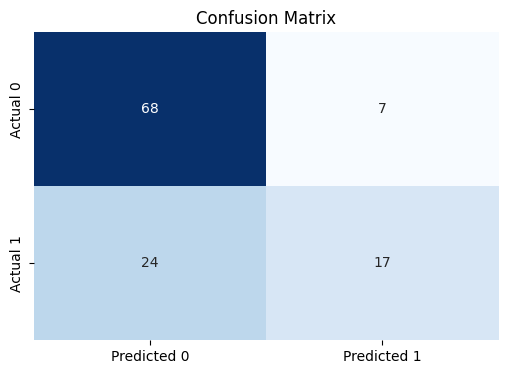


Observations:
The feature importance plot reveals the most influential features for the model.
The boxplots show the distribution of Glucose and BMI for both classes.
The confusion matrix indicates model performance on each class.
Further analysis could involve examining subgroups based on other features or combinations.
The class imbalance in the test data should be considered when interpreting the evaluation metrics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Analyze model predictions vs actual outcomes
print("Analysis of Model Predictions:")
print(f"Number of correct predictions: {(y_pred == y_test).sum()}")
print(f"Number of incorrect predictions: {(y_pred != y_test).sum()}")

# Feature importance analysis
feature_importance = best_estimator.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Analyze subgroups based on important features (e.g., 'Glucose', 'BMI')
for feature in ['Glucose', 'BMI']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=feature, data=pd.concat([X_test, y_test], axis=1))
    plt.title(f'Distribution of {feature} by Outcome')
    plt.show()

# Class imbalance analysis
print("\nClass Imbalance Analysis:")
print(f"Number of 0s in y_test: {y_test.value_counts()[0]}")
print(f"Number of 1s in y_test: {y_test.value_counts()[1]}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

print("\nObservations:")
print("The feature importance plot reveals the most influential features for the model.")
print("The boxplots show the distribution of Glucose and BMI for both classes.")
print("The confusion matrix indicates model performance on each class.")
print("Further analysis could involve examining subgroups based on other features or combinations.")
print("The class imbalance in the test data should be considered when interpreting the evaluation metrics.")

## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* **Data Cleaning:**  Impossible zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' were replaced with the median. Outliers in all numerical features were capped at the 1st and 99th percentiles using winsorization. Duplicate rows were removed.
* **Feature Engineering:** Interaction features ('Glucose\_BMI', 'Age\_DiabetesPedigree') and polynomial features ('Glucose\_squared', 'BMI\_squared') were created. All numerical features were then scaled using MinMaxScaler.  Feature selection using ANOVA F-value selected the top 10 features.
* **Model Performance:** The optimized Logistic Regression model achieved an accuracy of 0.73 on the test set, precision of 0.71, recall of 0.41, F1-score of 0.52, and AUC-ROC of 0.80.  The model shows moderate accuracy but low recall, indicating difficulty in correctly identifying diabetic cases. The confusion matrix revealed a higher number of false negatives.
* **Feature Importance:** 'Glucose\_BMI', 'BMI', and 'Age\_DiabetesPedigree' were identified as the most important features.

### Insights or Next Steps
* **Improve Recall:** Focus on techniques to improve the model's recall, such as exploring different classification algorithms, adjusting the classification threshold, or using oversampling methods to address the class imbalance.
* **Explore Other Features:** Investigate the potential impact of other features or combinations of features, or consider feature engineering to create more informative variables.
